# Convolutional Neural Network

Implementing a fully functioning ConvNet using Keras.

[**1. Initializing**](#1.-Initializing)

[**2. Keras model**](#2.-Keras-model)

## 1. Initializing

### 1.1. Importing packages

In [1]:
import numpy as np
import glob
import matplotlib.image as img
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model

### 1.2. Loading data

Loading the data and implementing one hot encoding for corresponding labels.

In [2]:
classes = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
train_data = {"X": [],"Y": np.empty((0,6))}
test_data = {"X": [],"Y": np.empty((0,6))}
my_data = {"train": train_data, "test": test_data}

for i in range(len(classes)):
    for s in my_data:
        m = 0
        for filename in glob.glob("C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_"+s+"/"+classes[i]+"/*.jpg"):
            im = img.imread(filename)
            my_data[s]["X"].append(im)
            m += 1

        y = np.zeros((m,6),int)
        y[:,i] = 1
        my_data[s]["Y"] = np.append(my_data[s]["Y"], y, axis=0)

print("Data loaded!")

Data loaded!


In [3]:
X_train = np.array(my_data["train"]["X"])/255.
X_test = np.array(my_data["test"]["X"])/255.
Y_train = my_data["train"]["Y"]
Y_test = my_data["test"]["Y"]
print("Train set shape:")
print(X_train.shape)
print(Y_train.shape)
print("Test set shape:")
print(X_test.shape)
print(Y_test.shape)

Train set shape:
(14034, 150, 150, 3)
(14034, 6)
Test set shape:
(3000, 150, 150, 3)
(3000, 6)


Loading a sample image to make sure data is alright.

The corresponding label is:
[0. 0. 0. 0. 1. 0.]



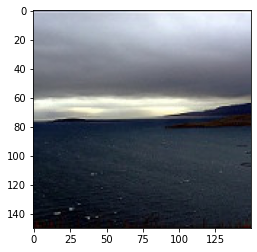

In [4]:
number = 10948
sample = X_train[number,:]
print("The corresponding label is:")
print(Y_train[number,:])
print()
plt.imshow(sample)

## 2. Keras model

###  2.1. Building the model

Implementing the keras model.

**Inputs** :  
- *input_shape*: shape of the input image

**Outputs** :  
- *model*: keras model

In [5]:
def buildModel(input_shape):
    
    X_input = Input(shape = input_shape)

    # CONV2D -> ReLU
    X = Conv2D(filters = 8, kernel_size = (4, 4), strides = 1, padding = "same", activation = "relu", use_bias = True, name = "conv1")(X_input)
    # MAXPOOL
    X = MaxPooling2D(pool_size = (5, 5), strides = 5, padding = "same", name = "max1")(X)
    # CONV2D -> ReLU
    X = Conv2D(filters = 16, kernel_size = (4, 4), strides = 1, padding = "same", activation = "relu", use_bias = True, name = "conv2")(X)
    # MAXPOOL
    X = MaxPooling2D(pool_size = (3, 3), strides = 3, padding = "same", name = "max2")(X)
    # CONV2D -> ReLU
    X = Conv2D(filters = 32, kernel_size = (2, 2), strides = 1, padding = "same", activation = "relu", use_bias = True, name = "conv3")(X)
    # MAXPOOL
    X = MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "same", name = "max3")(X)
    # FLATTEN + FULLYCONNECTED
    X = Flatten(name = "flat")(X)
    X = Dense(units = 6, activation='softmax', use_bias = True, name = "fc")(X)

    model = Model(inputs = X_input, outputs = X)
    
    return model

**Building a model instance**

In [6]:
myModel = buildModel(X_train.shape[1:])
myModel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 150, 150, 8)       392       
_________________________________________________________________
max1 (MaxPooling2D)          (None, 30, 30, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 30, 30, 16)        2064      
_________________________________________________________________
max2 (MaxPooling2D)          (None, 10, 10, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 10, 10, 32)        2080      
_________________________________________________________________
max3 (MaxPooling2D)          (None, 5, 5, 32)         

###  2.2. Running the model

Compiling and fitting the model.

In [7]:
myModel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
myModel.fit(x = X_train, y = Y_train, batch_size = 64, epochs = 50)

Epoch 1/50
220/220 [==============================] - 123s 557ms/step - loss: 1.1740 - categorical_accuracy: 0.5398
Epoch 2/50
220/220 [==============================] - 120s 545ms/step - loss: 0.8988 - categorical_accuracy: 0.6627
Epoch 3/50
220/220 [==============================] - 124s 564ms/step - loss: 0.7920 - categorical_accuracy: 0.7040
Epoch 4/50
220/220 [==============================] - 118s 538ms/step - loss: 0.7196 - categorical_accuracy: 0.7359
Epoch 5/50
220/220 [==============================] - 123s 559ms/step - loss: 0.6674 - categorical_accuracy: 0.7582
Epoch 6/50
220/220 [==============================] - 120s 546ms/step - loss: 0.6505 - categorical_accuracy: 0.7616
Epoch 7/50
220/220 [==============================] - 125s 570ms/step - loss: 0.6013 - categorical_accuracy: 0.7826
Epoch 8/50
220/220 [==============================] - 124s 565ms/step - loss: 0.5736 - categorical_accuracy: 0.7912
Epoch 9/50
220/220 [==============================] - 117s 530ms/step - 

###  2.3. Evaluating the model

Evaluating the model.

In [8]:
train_eval =  myModel.evaluate(x = X_train, y = Y_train)
test_eval = myModel.evaluate(x = X_test, y = Y_test)

print()
print ("Train Accuracy = " + str(train_eval[1]))
print()
print ("Test Accuracy = " + str(test_eval[1]))

94/94 [==============================] - 11s 119ms/step - loss: 0.6163 - categorical_accuracy: 0.8127

Train Accuracy = 0.926321804523468

Test Accuracy = 0.812666654586792


In [10]:
myModel.save("./src/kerasModel_2")

INFO:tensorflow:Assets written to: ./src/kerasModel_2\assets
